In [1]:
%matplotlib inline
import pysal as ps
import pandas as pd
import numpy as np

from shapely.geometry import Polygon, point
from geopandas import GeoSeries, GeoDataFrame, read_file
from pandas import DataFrame
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
def generateCordinates(lonArray, latArray):
    from shapely.geometry import Point
    
    pointArray=[]
    for i in range(0, len(lonArray)):
        point = Point(lonArray[i], latArray[i])
        pointArray.append(point)
    return pointArray

def findPointsWithin(polygons, inputPointSet):    
    values_i = []
    found = 0    
    for i, poly in polygons.iterrows():
        value_i = []
        for j, point in inputPointSet.iterrows():           
            if poly.geometry.contains(point.geometry):
                value_i.append(point['I'])
                found = 1
                inputPointSet = inputPointSet.drop([j])
        if found == 1:
            values_i.append([value_i, poly['code'], poly['geometry']])
            found = 0                             
    return values_i

def extractMaxIs(values_i):
    max_i= []
    codes = []
    geo = []
    temp=0
    for i in range(0,len(values_i)):
        max_i.append(max(values_i[i][0]))
        codes.append(values_i[i][1])
        geo.append(values_i[i][2])


    LMoran_maxs = GeoDataFrame()
    LMoran_maxs['LSOA11CD'] = GeoSeries(codes)
    LMoran_maxs['geometry'] = GeoSeries(geo)
    LMoran_maxs['LMoranMax'] = GeoSeries(max_i)
    
    return LMoran_maxs

def getTopQuantile(polygons):
    Is = []
    geo = []
    for i in range(0, len(polygons)/5):
        Is.append(max(polygons['I']))
        index = polygons.loc[polygons['I']==max(polygons['I'])].index
        geo.append(polygons['geometry'][index[0]])   
        polygons = polygons.drop([index[0]])
    qTop5Moran = GeoDataFrame()
    qTop5Moran['geometry'] = GeoSeries(geo)
    qTop5Moran['I'] = GeoSeries(Is)
    return qTop5Moran

In [8]:
LMoranDamageAndArson1 = pd.read_csv("CrimeStatOutput/1_2017DamageAndArson1CrimeCountLMoranI.csv",usecols=['Cluster','X Co-ordinate','Y Coordinate', 'I'])
pointArray = generateCordinates(LMoranDamageAndArson1['X Co-ordinate'], LMoranDamageAndArson1['Y Coordinate'])
LMoranDamageAndArson1['geometry'] = pointArray
LMoranDamageAndArson1 = GeoDataFrame(LMoranDamageAndArson1, geometry='geometry')

LMoranBurglary1 = pd.read_csv("CrimeStatOutput/1_2017Burglary1CrimeCountLMoranI.csv",usecols=['Cluster','X Co-ordinate','Y Coordinate', 'I'])
pointArray = generateCordinates(LMoranBurglary1['X Co-ordinate'], LMoranBurglary1['Y Coordinate'])
LMoranBurglary1['geometry'] = pointArray
LMoranBurglary1 = GeoDataFrame(LMoranBurglary1, geometry='geometry')

LMoranPublicOrder1= pd.read_csv("CrimeStatOutput/1_2017PublicOrder1CrimeCountLMoranI.csv",usecols=['Cluster','X Co-ordinate','Y Coordinate', 'I'])
pointArray = generateCordinates(LMoranPublicOrder1['X Co-ordinate'], LMoranPublicOrder1['Y Coordinate'])
LMoranPublicOrder1['geometry'] = pointArray
LMoranPublicOrder1 = GeoDataFrame(LMoranPublicOrder1, geometry='geometry')

LMoranVehicleCrime1 = pd.read_csv("CrimeStatOutput/1_2017VehicleCrime1CrimeCountLMoranI.csv",usecols=['Cluster','X Co-ordinate','Y Coordinate', 'I'])
pointArray = generateCordinates(LMoranVehicleCrime1['X Co-ordinate'], LMoranVehicleCrime1['Y Coordinate'])
LMoranVehicleCrime1['geometry'] = pointArray
LMoranVehicleCrime1 = GeoDataFrame(LMoranVehicleCrime1, geometry='geometry')


In [55]:
LMoran1_2017Antisocia = pd.read_csv("CrimeStatOutput/1_2017Antisocia1CrimeCountLMoranI.csv",usecols=['Cluster','X Co-ordinate','Y Coordinate', 'I'])
pointArray = generateCordinates(LMoran1_2017Antisocia['X Co-ordinate'], LMoran1_2017Antisocia['Y Coordinate'])
LMoran1_2017Antisocia['geometry'] = pointArray
LMoran1_2017Antisocia = GeoDataFrame(LMoran1_2017Antisocia, geometry='geometry')

LMoran1_2017ViolenceAndSex = pd.read_csv("CrimeStatOutput/1_2017ViolenceAndSex1CrimeCountLMoranI.csv",usecols=['Cluster','X Co-ordinate','Y Coordinate', 'I'])
pointArray = generateCordinates(LMoran1_2017ViolenceAndSex['X Co-ordinate'], LMoran1_2017ViolenceAndSex['Y Coordinate'])
LMoran1_2017ViolenceAndSex['geometry'] = pointArray
LMoran1_2017ViolenceAndSex = GeoDataFrame(LMoran1_2017ViolenceAndSex, geometry='geometry')

In [48]:
#LMoran1_2017Antisocia.loc[LMoran1_2017Antisocia['I'] > 3]
#LMoran1_2017Antisocia
#count =0 
#for i, point in LMoran1_2017Antisocia.iterrows():
#    if point['I']<point['Expt I']:
#        #print point
#        LMoran1_2017Antisocia = LMoran1_2017Antisocia.drop([i])
#        #count = count + 1
#print count
#len(LMoran1_2017Antisocia)

In [10]:
areas = read_file('data/Clipped.shp')

In [11]:
#aggregate local moran's I values to which polygon they belog to
DamageAndArson1_Is=findPointsWithin(areas, getTopQuantile(LMoranDamageAndArson1))
DamageAndArson1_IMax = extractMaxIs(DamageAndArson1_Is)
DamageAndArson1_IMax.to_file('DamageAndArson1_IMax.shp', driver='ESRI Shapefile')
print "AS finished"

#aggregate local moran's I values to which polygon they belog to
Burglary1_Is=findPointsWithin(areas, getTopQuantile(LMoranBurglary1))
Burglary1_IMax = extractMaxIs(Burglary1_Is)
Burglary1_IMax.to_file('Burglary1_IMax.shp', driver='ESRI Shapefile')
print "AS finished"

#aggregate local moran's I values to which polygon they belog to
PublicOrder1_Is=findPointsWithin(areas, getTopQuantile(LMoranPublicOrder1))
PublicOrder1_IMax = extractMaxIs(PublicOrder1_Is)
PublicOrder1_IMax.to_file('PublicOrder1_IMax.shp', driver='ESRI Shapefile')
print "AS finished"

#aggregate local moran's I values to which polygon they belog to
VehicleCrime1_Is=findPointsWithin(areas, getTopQuantile(LMoranVehicleCrime1))
VehicleCrime1_IMax = extractMaxIs(VehicleCrime1_Is)
VehicleCrime1_IMax.to_file('VehicleCrime1_IMax.shp', driver='ESRI Shapefile')
print "AS finished"

AS finished
AS finished
AS finished
AS finished


In [56]:
#aggregate local moran's I values to which polygon they belog to
#Antisocial117_Is=findPointsWithin(areas, getTopQuantile(LMoran1_2017Antisocia))
#Antisocial117_IMax = extractMaxIs(Antisocial117_Is)
#Antisocial117_IMax.to_file('Antisocial117_LsoaIMax.shp', driver='ESRI Shapefile')
#print "AS finished"

#ViolenceAndSex117_Is=findPointsWithin(areas, getTopQuantile(LMoran1_2017ViolenceAndSex))
#ViolenceAndSex117_IMax = extractMaxIs(ViolenceAndSex117_Is)
#ViolenceAndSex117_IMax.to_file('ViolenceAndSex117_LsoaIMax.shp', driver='ESRI Shapefile')
#print "VS finished"

AS finished
VS finished


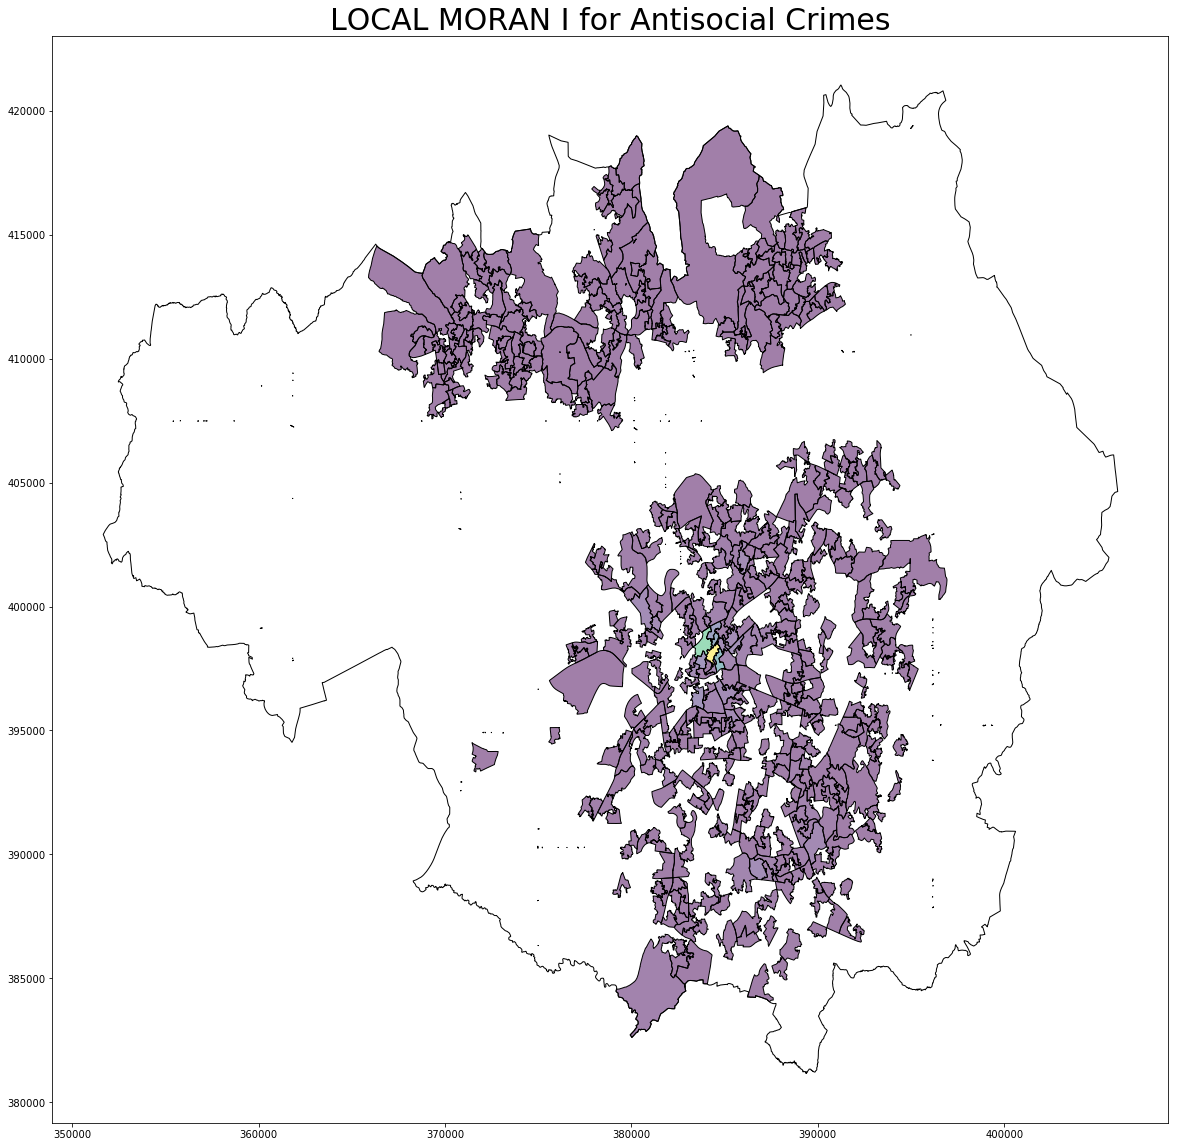

In [57]:
disolved = read_file('data/disolved.shp')
fig, ax = plt.subplots(figsize=(20,20))
ax=Antisocial117_IMax.plot(column='LMoranMax', ax=disolved.plot(ax=ax, color="white"))
plt.title('LOCAL MORAN I for Antisocial Crimes', size = 30)

In [ ]:
disolved = read_file('data/disolved.shp')
fig, ax = plt.subplots(figsize=(20,20))
ax=ViolenceAndSex117_IMax.plot(column='LMoranMax', ax=disolved.plot(ax=ax, color="white"))
plt.title('LOCAL MORAN I for Violence And Sex Crimes', size = 30)

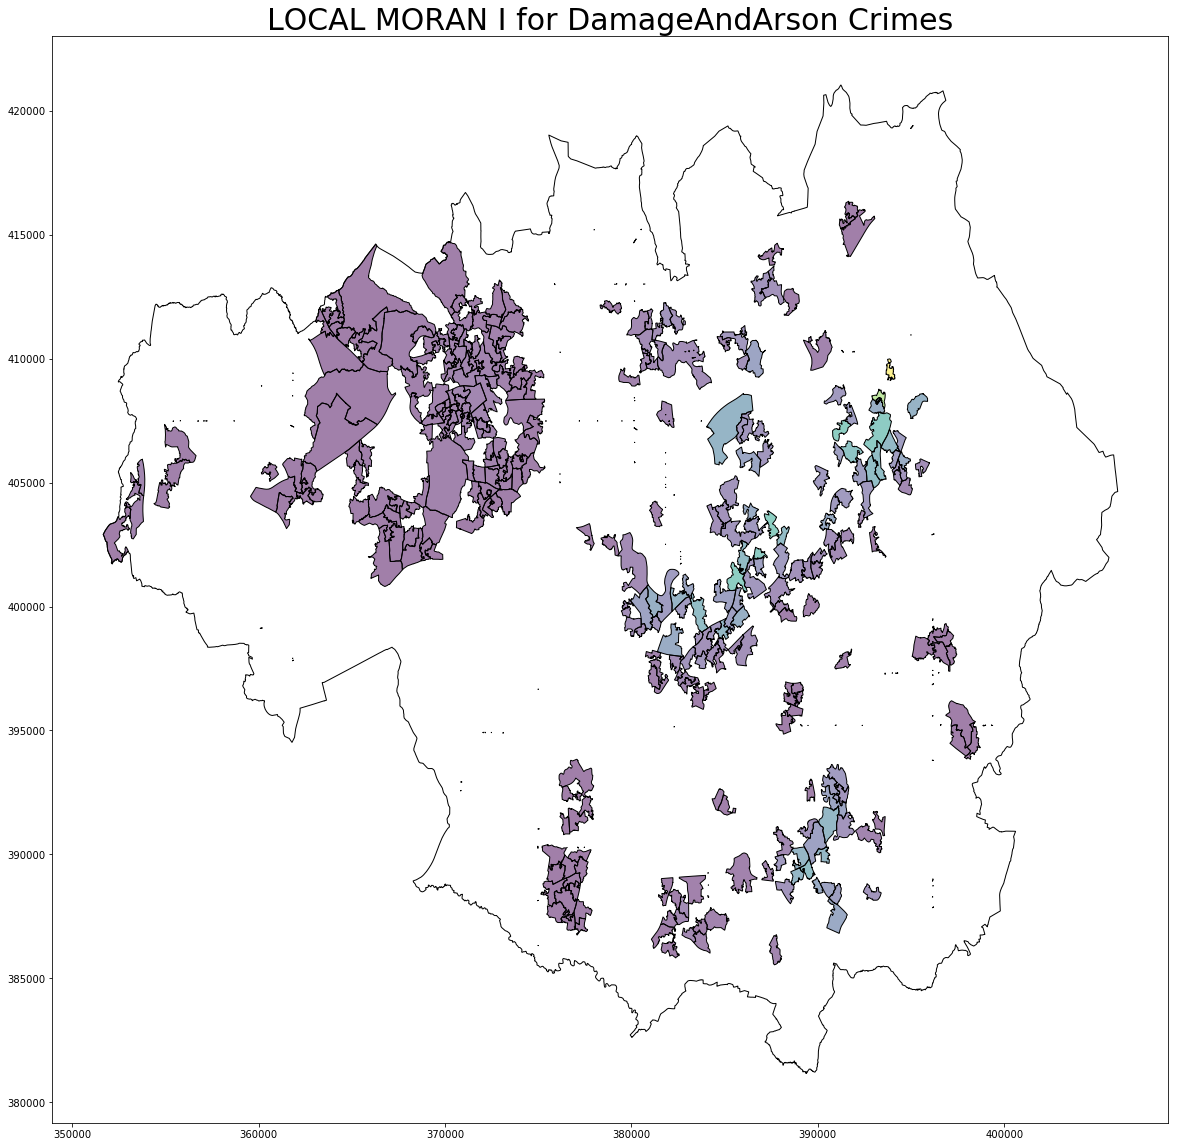

In [12]:
disolved = read_file('data/disolved.shp')
fig, ax = plt.subplots(figsize=(20,20))
ax=DamageAndArson1_IMax.plot(column='LMoranMax', ax=disolved.plot(ax=ax, color="white"))
plt.title('LOCAL MORAN I for DamageAndArson Crimes', size = 30)